In [1]:
import pandas as pd
import psycopg2
import numpy as np
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("/home/scidb/HeartRatePatterns/Python"))
from LogisticRegresion import ajustLogisticRegression
from PlotWords import plot_word
from Matrix import convert_matrix

In [3]:
def savePearson(pearson,dbname="mimic") :
    conn = psycopg2.connect("dbname="+dbname)
    cur = conn.cursor()
    insert_statement=('INSERT INTO wordspearson(word,p1,p2)'
                      ' SELECT unnest( %(word)s ) ,'
                      ' unnest( %(p1)s) ,'
                      ' unnest( %(p2)s)')
    word=[r['word'] for r in pearson]
    p1=[r['p1'] for r in pearson]
    p2=[r['p2'] for r in pearson]
#    print(cur.mogrify(insert_statement,locals()))
    cur.execute(insert_statement,locals())
    conn.commit()
    cur.close()
    conn.close()

In [4]:
def selectPearson(dbname="mimic") :
    conn = psycopg2.connect("dbname="+dbname)
    cur = conn.cursor()
    select_statement='SELECT word,p1,p2 FROM wordspearson'
#    print(cur.mogrify(delete_statement,locals()))
    cur.execute(select_statement)
    select = []
    for row in cur :
        select.append({"word":row[0],"p1":row[1],"p2":row[2],})
    cur.close()
    conn.close()
    return select

In [5]:
def cleanPearson(dbname="mimic") :
    conn = psycopg2.connect("dbname="+dbname)
    cur = conn.cursor()
    delete_statement='DELETE FROM wordspearson'
#    print(cur.mogrify(delete_statement,locals()))
    cur.execute(delete_statement,locals())
    conn.commit()
    cur.close()
    conn.close()

In [6]:
table = convert_matrix()
print(table.shape)
table

240592
(745, 21724)


,,aaaaa,aaaab,aaaac,aaaad,aaaae,aaaaf,aaaag,aaaah,aaaai,aaaaj,...,lllce,lllch,lllci,lllcl,lllhb,lllib,lllii,llllc,lllli,lllll
subject_id,isAlive,,,,,,,,,,,,,,,,,,,,,
20,0,13957,403,0,19,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,1,13,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,1,13957,749,0,22,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,1,5897,1046,2,93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177,1,7577,212,0,12,0,11,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,1,10787,318,2,55,0,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,1,12149,24,0,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,1,145,131,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,1,103,100,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
survived = table.index.labels[1].tolist()
patients = table.values
columns = list(table.columns.values)

In [8]:
cleanPearson()
pearsonList = []
for i in range(len(columns)):
    pearson = pearsonr(patients[:,i],survived)
    pearsonList.append({'word':columns[i],'p1':pearson[0],'p2':pearson[1]})
savePearson(pearsonList)

In [9]:
table = convert_matrix(True)
table.shape

13727


(683, 400)

In [10]:
survived = table.index.labels[1].tolist()
patients = table.values

In [11]:
patients_train, patients_test,survived_train, survived_test = train_test_split(patients,survived,test_size=0.2, random_state=42)

In [12]:
print(table.shape)
print(patients_train.shape)
print(patients_test.shape)

(683, 400)
(546, 400)
(137, 400)


In [13]:
model = ajustLogisticRegression(patients_train,survived_train,patients_test,survived_test)

acurracy is 78.83%


In [14]:
print("Logistic Regression acurracy is %2.2f" % accuracy_score(survived_test,model.predict(patients_test)))

Logistic Regression acurracy is 0.79


In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [16]:
def aucModel(name,survived_test,model,patients_test):
    logit_roc_auc = roc_auc_score(survived_test,model.predict(patients_test))
    print(name+" AUC = %2.2f"% logit_roc_auc)
    return logit_roc_auc

In [17]:
print("Logistic Regression acurracy is %2.2f" % accuracy_score(survived_test,model.predict(patients_test)))
logit_roc_auc = aucModel("Logistic",survived_test,model,patients_test)

Logistic Regression acurracy is 0.79
Logistic AUC = 0.50


In [18]:
model

LogisticRegressionCV(Cs=[2.62e-05, 2.728e-05, 2.836e-05, 2.9439999999999996e-05, 3.052e-05, 3.1599999999999996e-05],
           class_weight=None, cv=5, dual=True, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=-1, penalty='l2', random_state=0, refit=True,
           scoring='roc_auc', solver='liblinear', tol=0.0001, verbose=0)

In [19]:
from operator import itemgetter
pearsonDict = selectPearson()
pearsonDict = sorted(pearsonDict, key=itemgetter('p1'), reverse=True)

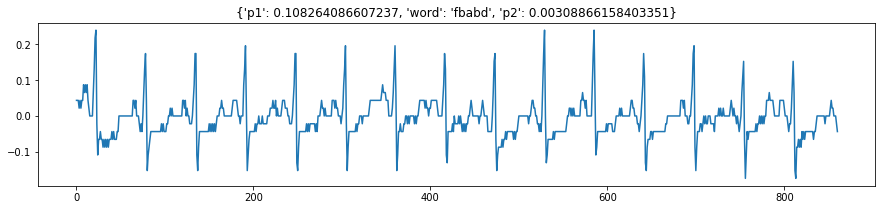

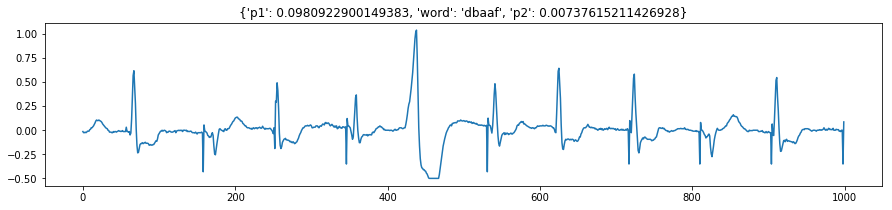

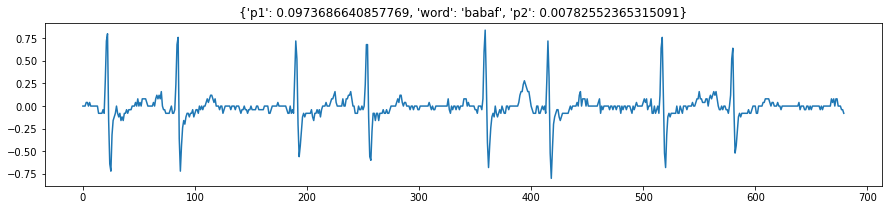

adbaf 6070019 6071060 mimic2wdb/matched/s05289/s05289-3007-07-16-00-10


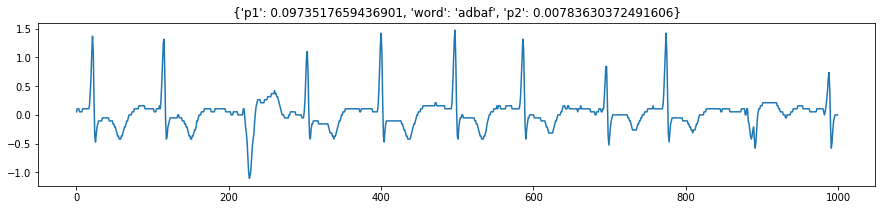

ffdaa 6500779 6501788 mimic2wdb/matched/s11243/s11243-2878-10-10-21-45


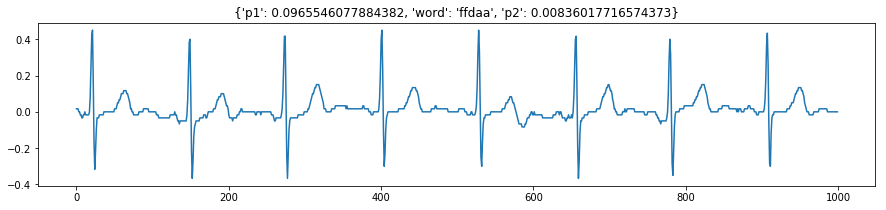

In [20]:
plot_word(pearsonDict[:5])